In [1]:
# dependencies
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sqlalchemy import create_engine
 
from config import conn_str   

In [2]:
# connect to db
engine = create_engine(f"postgresql://{conn_str}" )
conn = engine.connect()

In [3]:
# employee titles and salaries 
emp_info_df = pd.read_sql("select emp.employee_no, sl.employee_salary, tt.title " +
                              "from employees as emp " +
                              "join salaries as sl on emp.employee_no = sl.employee_no "+
                              "join titles as tt on emp.employee_title_id = tt.title_id ", conn)
emp_info_df.head()

,employee_no,employee_salary,title
0,57444,48973,Engineer
1,13616,40000,Senior Engineer
2,240129,43548,Technique Leader
3,427958,63377,Staff
4,35916,40000,Senior Engineer


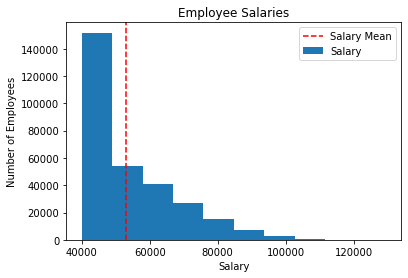

In [4]:
# most common salary range
plt.hist(emp_info_df['employee_salary'], label = 'Salary', density = False)
plt.xlabel("Salary")
plt.ylabel("Number of Employees")
plt.title("Employee Salaries")
plt.axvline(emp_info_df['employee_salary'].mean(), label = "Salary Mean", color = 'r', linestyle = 'dashed') 
plt.legend() 
plt.savefig("../images/Salaries_Range.png")
plt.show()

In [5]:
# average salary by title
avg_df = emp_info_df.groupby(['title']).mean()['employee_salary'] 
avg_df.head()

title
Assistant Engineer    48564.434447
Engineer              48535.336511
Manager               51531.041667
Senior Engineer       48506.799871
Senior Staff          58550.172704
Name: employee_salary, dtype: float64

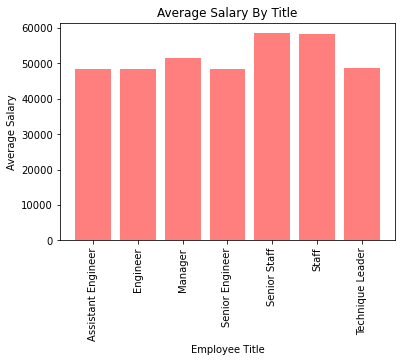

In [6]:
# bar chart of average salary by title
titles = avg_df.index
x_axis = np.arange(len(titles))
tick_locations = [value for value in x_axis]

plt.bar(x_axis, avg_df, color = "r", alpha = 0.5, align = "center")
plt.xticks(tick_locations, titles, rotation = 90)
plt.title("Average Salary By Title")
plt.xlabel("Employee Title")
plt.ylabel("Average Salary")
plt.savefig("../images/Average_Salary_By_Title.png")
plt.show()